# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
#Investigating 8th Grade Math
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [31]:
#checking nan in 8th Grade Math and renaming total students
df.isna().sum()
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.rename({'GRADES_ALL_G':'TOTAL_STUDENTS'}, axis=1,inplace=True)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,TOTAL_STUDENTS,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,expenditure/state
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *8th Grade Math*

How many years of data are logged in our dataset? 

In [16]:
#finding unique years
un_years = df["YEAR"].unique()
un_years
#8th Grade Math scores logged over 13 Years

array([1992, 2000, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 1990, 2017,
       1996, 2019])

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [21]:
#using groupby function to get data organized by state
df.groupby(["STATE"])["AVG_MATH_8_SCORE"].mean()
#Michigan has a score of 276.17 while Ohio has a higher average of 282.25

278.5171248039172

Find the average for your outcome score across all states in 2019

In [24]:
#take the mean of the original using mean() again
(df.groupby(["STATE"])["AVG_MATH_8_SCORE"].mean()).mean()
#average is 278.52

278.5171248039172

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [25]:
#use max()
df.groupby(["STATE"])["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [38]:
#proportion of instruction / total expenditure
df["instruction/total expenditure proportion"] = df["INSTRUCTION_EXPENDITURE"] / df["TOTAL_EXPENDITURE"]
df["expenditure/student"] = df["INSTRUCTION_EXPENDITURE"] / df["TOTAL_STUDENTS"]
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_9_12_G,TOTAL_STUDENTS,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,expenditure/state,instruction/total expenditure,instruction/total expenditure proportion,expenditure/student
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,731634.0,208.0,252.0,207.0,NaN,NaN,0.558333,0.558333,2.025197
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,673477.0,215.0,265.0,209.0,NaN,NaN,0.422130,0.422130,2.132082
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,441490.0,210.0,256.0,211.0,NaN,NaN,0.553248,0.553248,2.184247
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,5254844.0,208.0,261.0,202.0,NaN,NaN,0.529091,0.529091,2.732512
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,NaN,612635.0,221.0,272.0,217.0,NaN,NaN,0.503079,0.503079,2.680986


Feature engineering justification: **I wanted to find if there is a correlation with the proportion of the budget spent on education and if there is a correlation with how much each state spends on its students**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Proportion of Instruction vs Total')

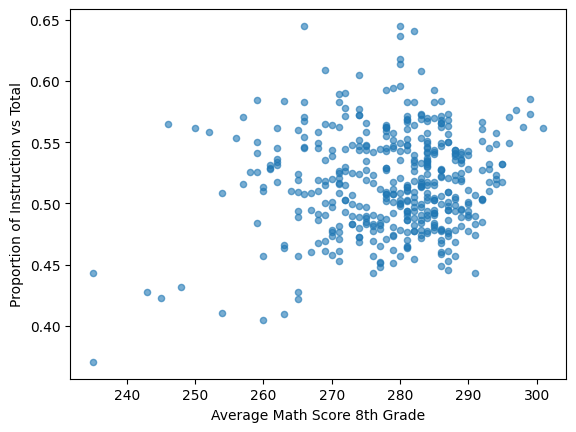

In [41]:
df.plot.scatter(x="AVG_MATH_8_SCORE", y= "instruction/total expenditure proportion", alpha=0.6)
plt.xlabel('Average Math Score 8th Grade')
plt.ylabel('Proportion of Instruction vs Total')

**Comparing the Average 8th Grade Math Score and Proportion of Instruction vs Total shows a slight correlation, indicating that the amount of the budget spent on education is a significant factor**

**Visualization 2**

Text(0, 0.5, 'Expenditure per Student')

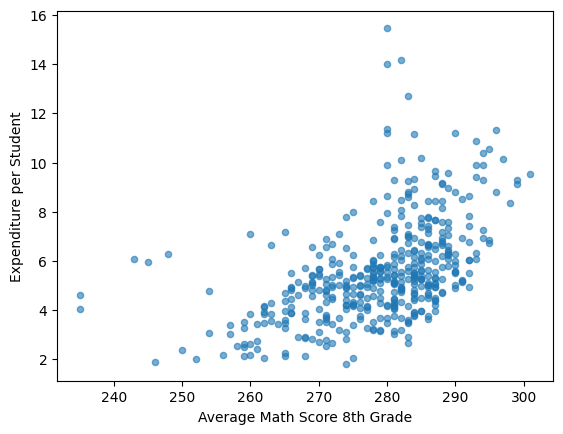

In [42]:
df.plot.scatter(x="AVG_MATH_8_SCORE", y= "expenditure/student", alpha=0.6)
plt.xlabel('Average Math Score 8th Grade')
plt.ylabel('Expenditure per Student')

**There is a stronger correlation between 8th grade math scores and the amount spent on each student, this makes more sense as it is a more direct comparison of the student/money relationship compared with graph 1**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
#Included reading score in data
X = df[['instruction/total expenditure proportion','expenditure/student','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [45]:
#Included 33% of data in testing output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [46]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [47]:
# create your model here
model = LinearRegression()

In [48]:
model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [57]:
print(model.intercept_)

-13.642892379656075


In [54]:
#Finds the R^2 value of test output
model.score(X_test, y_test)

0.8153500641471472

In [55]:
#Finding the standard deviation of predictions vs actual test output, shows a large variance
np.std(model.predict(X_test)-y_test)

3.3936544019789987

In [58]:
#Comparing the difference in variance between the prediction and test output, similar to stdev
np.var(model.predict(X_test)-y_test)

11.516890200071435

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

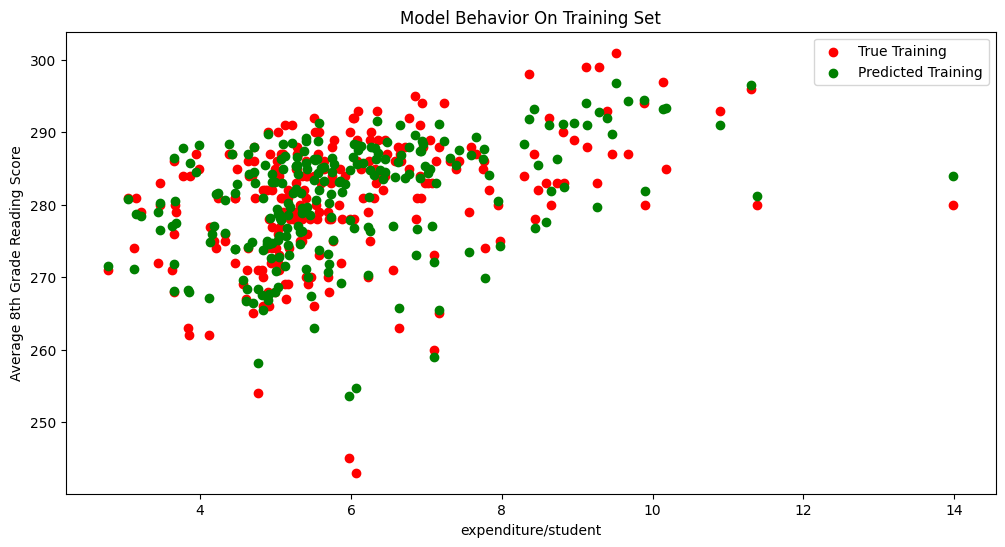

In [60]:
col_name = 'expenditure/student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average 8th Grade Reading Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

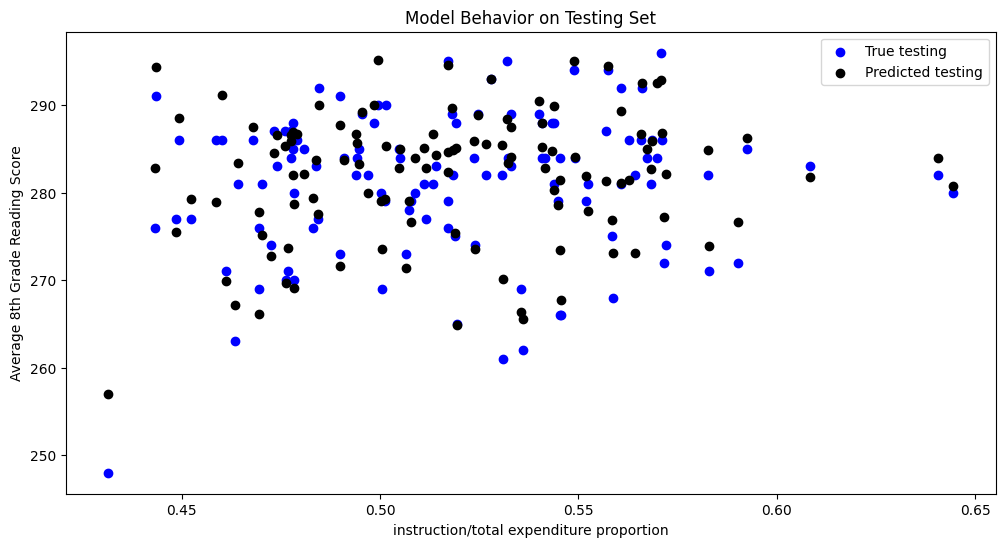

In [61]:
col_name = 'instruction/total expenditure proportion'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average 8th Grade Reading Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

After choosing 8th Grade Average Math as the variable I wanted to observe, I decided to focus on money spent by each state as the independent variable to test. I used the expenditure per student as an independent variable and also created another variable with data representing the ratio of expenditure on schools compared to the total expenditure of an entire state. I used this variable to see how states who had less financial priority over education performed in schools. The final variable I chose was 8th Grade Average Reading scores because I knew there would be a strong correlation, I used this as a positive control. After running my train and test models I found that there was a significant variance between the predicted output and the results of the test data. There was a stronger correlation between the given expenditure per student variable than the variable I created, however both variables when run with the predicted set matched the test data fairly well. However, the given variable on expenditure matched the prediction data more closely.